Getting the global confirmed cases data...

In [3]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


--2020-09-12 14:21:30--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255898 (250K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 249.90K  --.-KB/s    in 0.03s   

2020-09-12 14:21:30 (8.07 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [255898/255898]



Getting the global death data...

In [28]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


--2020-09-12 14:52:21--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180466 (176K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv.1’

time_series_covid19 100%[===================>] 176.24K  --.-KB/s    in 0.03s   

2020-09-12 14:52:21 (6.78 MB/s) - ‘time_series_covid19_deaths_global.csv.1’ saved [180466/180466]



The global fatality rate is:  0.03213871446616781



The graphs of the power spectrum of e depicts the energy distribution 
of the difference between observed and smooth case counts over a period of 
time


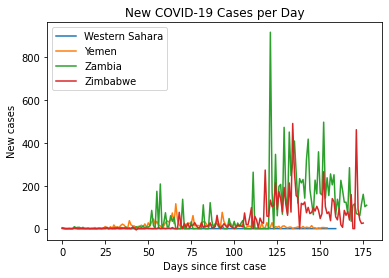

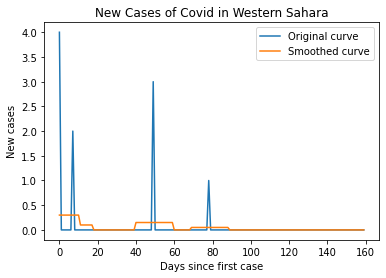

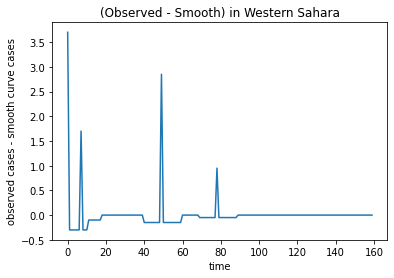

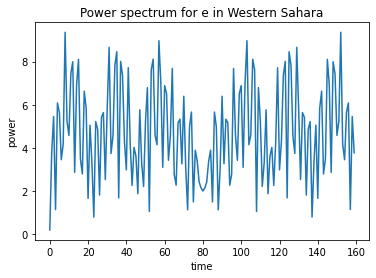

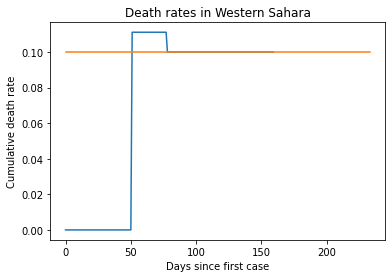

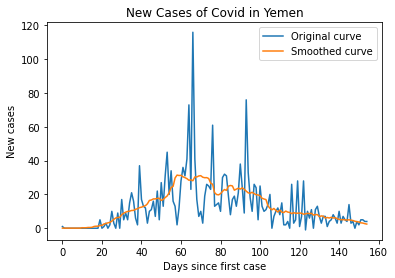

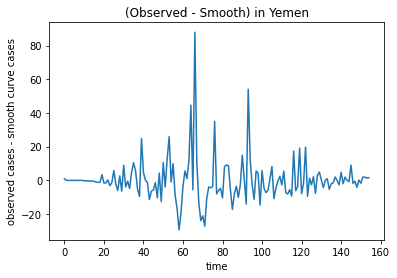

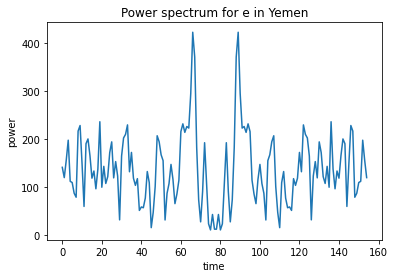

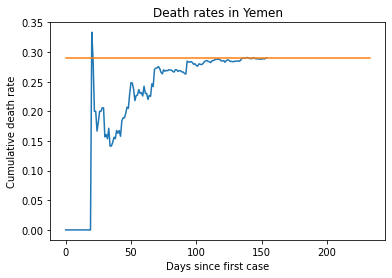

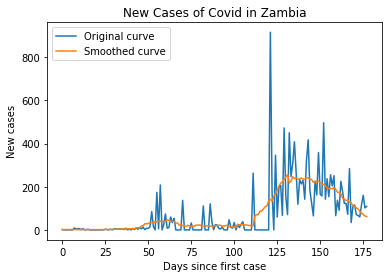

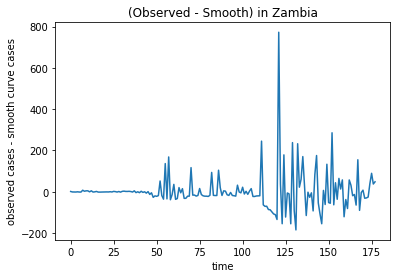

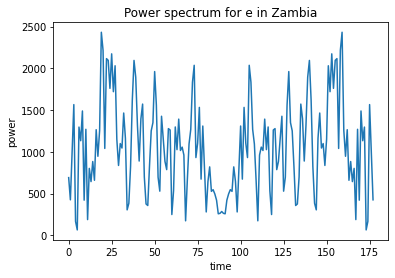

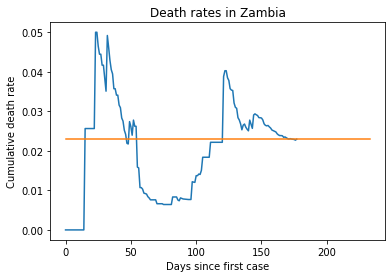

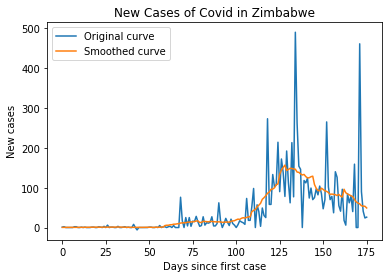

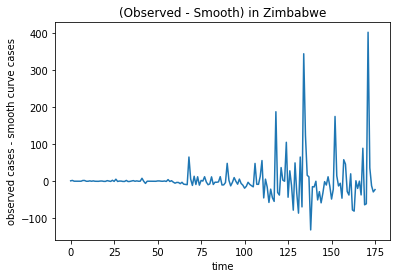

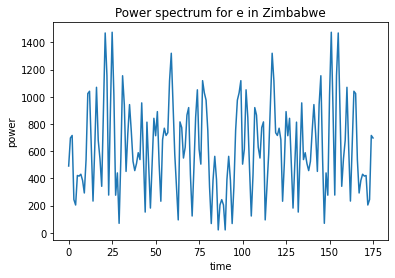

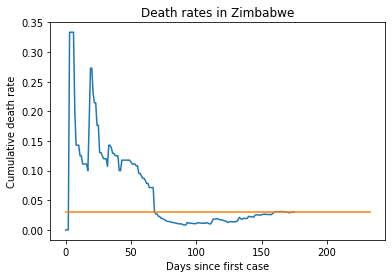

In [97]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

def newCases(cumVals):
  newVals = [];
  newVals.append(cumVals[0]);
  for i in range(1, len(cumVals)):
    newVals.append(cumVals[i] - cumVals[i - 1]);
  return newVals;

def plotSmoothNewVals(newvals):
  plt.figure();
  plt.plot(newVals);
  smoothNewVals = np.convolve(newVals, k, mode='same');
  plt.plot(smoothNewVals);
  plt.title('New Cases of Covid in '+ countryNames[nameIndex]);
  
  plt.xlabel('Days since first case');
  plt.ylabel('New cases');
  plt.legend(['Original curve', 'Smoothed curve']);
  return smoothNewVals;

def calculateE(newVals, smoothNewVals):
  e = [];
  for day in range(len(newVals)):
    e.append(newVals[day] - smoothNewVals[day]);
  plt.figure(); 
  plt.plot(e);
  plt.title('(Observed - Smooth) in ' + countryNames[nameIndex]);
  plt.xlabel('time');
  plt.ylabel('observed cases - smooth curve cases');
  return e;

def plotPowerSpectrum(e):
  t = np.arange(0, len(e), 1);
  a = np.fft.fft(e * (-1)**t);
  b = np.sqrt(a.real**2 + a.imag**2);
  plt.figure();
  plt.plot(b);
  plt.title('Power spectrum for e in ' + countryNames[nameIndex]);
  plt.xlabel('time');
  plt.ylabel('power');

# Read in entire COVID-19 data file
df = pd.read_csv("time_series_covid19_confirmed_global.csv");

dr = pd.read_csv("time_series_covid19_deaths_global.csv");

# Read in 4 countries
Sahara = df.loc[df['Country/Region'] == 'Western Sahara'];
Yemen = df.loc[df['Country/Region'] == 'Yemen'];
Zambia = df.loc[df['Country/Region'] == 'Zambia'];
Zimbabwe = df.loc[df['Country/Region'] == 'Zimbabwe'];

SaharaDeaths = dr.loc[dr['Country/Region'] == 'Western Sahara'];
SaharaDeaths = SaharaDeaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
SaharaDeaths = SaharaDeaths.values[0];
#print(SaharaDeaths);

YemenDeaths = dr.loc[dr['Country/Region'] == 'Yemen'];
YemenDeaths = YemenDeaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
YemenDeaths = YemenDeaths.values.tolist();
YemenDeaths = YemenDeaths[0];
#YememDeaths = YemenDeaths.values[0];
#print("PRINTING YEMEN DEATHS")
#print(YemenDeaths);


ZambiaDeaths = dr.loc[dr['Country/Region'] == 'Zambia'];
ZambiaDeaths = ZambiaDeaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
ZambiaDeaths = ZambiaDeaths.values[0];
#rint(ZambiaDeaths);

ZimbabweDeaths = dr.loc[dr['Country/Region'] == 'Zimbabwe'];
ZimbabweDeaths = ZimbabweDeaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
ZimbabweDeaths = ZimbabweDeaths.values[0];
#print(ZimbabweDeaths);

dr = dr.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
#print(SaharaDeaths)
#SaharaDeaths = SaharaDeaths[0];
#print(SaharaDeaths.values)



# Creating a kernel for convolution
k = np.zeros(20) + 1; 
k = k / k.size # Should give us 1 / 20 

# Plot the data for each country 
countriesData = [Sahara, Yemen, Zambia, Zimbabwe];
countriesDeathData = [SaharaDeaths, YemenDeaths, ZambiaDeaths, ZimbabweDeaths];
countryNames = ['Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'];
nameIndex = 0; 
for country in countriesData:
  country = country.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
  totalColumns = len(country.columns);
  countryCopy = country.values[0];
  country = country.loc[:,(country != 0).any(axis = 0)];
  countryValues = country.values[0];
  # Generate list of new cases per day
  newVals = newCases(countryValues);
  #Plot new cases per day
  plt.figure(2);
  plt.plot(newVals);
  plt.legend(countryNames);
  plt.title('New COVID-19 Cases per Day');
  plt.xlabel('Days since first case');
  plt.ylabel('New cases');

  #Smooth the curves
  smoothNewVals = plotSmoothNewVals(newVals);

  # Calculate e (the difference between raw and smoothed)
  e = calculateE(newVals, smoothNewVals);

  #Plot the power spectrum
  plotPowerSpectrum(e);
  
  #Move onto next country
  

  # Calculate daily fatality rate. Extract the fatality data.
  # Get index of the column for the first day
  firstDayIndex = totalColumns - len(countryValues);
  deathRates = [];
  
  tempCountryDeaths = countriesDeathData[nameIndex];

  for day in range(firstDayIndex, totalColumns):
    deathRates.append(tempCountryDeaths[day] / countryCopy[day]);
  # Create the horizontal line
  horizontalVal = tempCountryDeaths[totalColumns - 1] / countryCopy[totalColumns - 1];
  horizontalLine = []; 
  for i in range(totalColumns):
    horizontalLine.append(horizontalVal);

  plt.figure(); 
  plt.plot(deathRates);
  plt.plot(horizontalLine);
  plt.xlabel('Days since first case');
  plt.ylabel('Cumulative death rate');
  plt.title('Death rates in '+ countryNames[nameIndex]);
  nameIndex = nameIndex + 1;


# Calculate global death rate

# Read in death rate
dr2 = pd.read_csv("time_series_covid19_deaths_global.csv")
dr2 = dr2.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);
deathVals = dr2.values;
# get the rightmost column to have most recent date for both charts
rightMostConfirmed = df[df.columns[len(df.columns) - 1]];
rightMostDeaths = dr2[dr2.columns[len(dr2.columns) - 1]];
totalConfirmed = sum(rightMostConfirmed);
totalDeaths = sum(rightMostDeaths);
globalFatalityRate = totalDeaths / totalConfirmed;
print("The global fatality rate is: ",globalFatalityRate);
print('\n\n');
print("The graphs of the power spectrum of e depicts the energy distribution \n"
+ "of the difference between observed and smooth case counts over a period of \n"
+ "time");
